In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
d={'Male':1, 'Female':0}

In [5]:
data['Gender'] = data['Gender'].map(d)

In [6]:
data1=data.drop(['CustomerID'],axis=1)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null int64
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4)
memory usage: 6.3 KB


In [8]:
data1.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


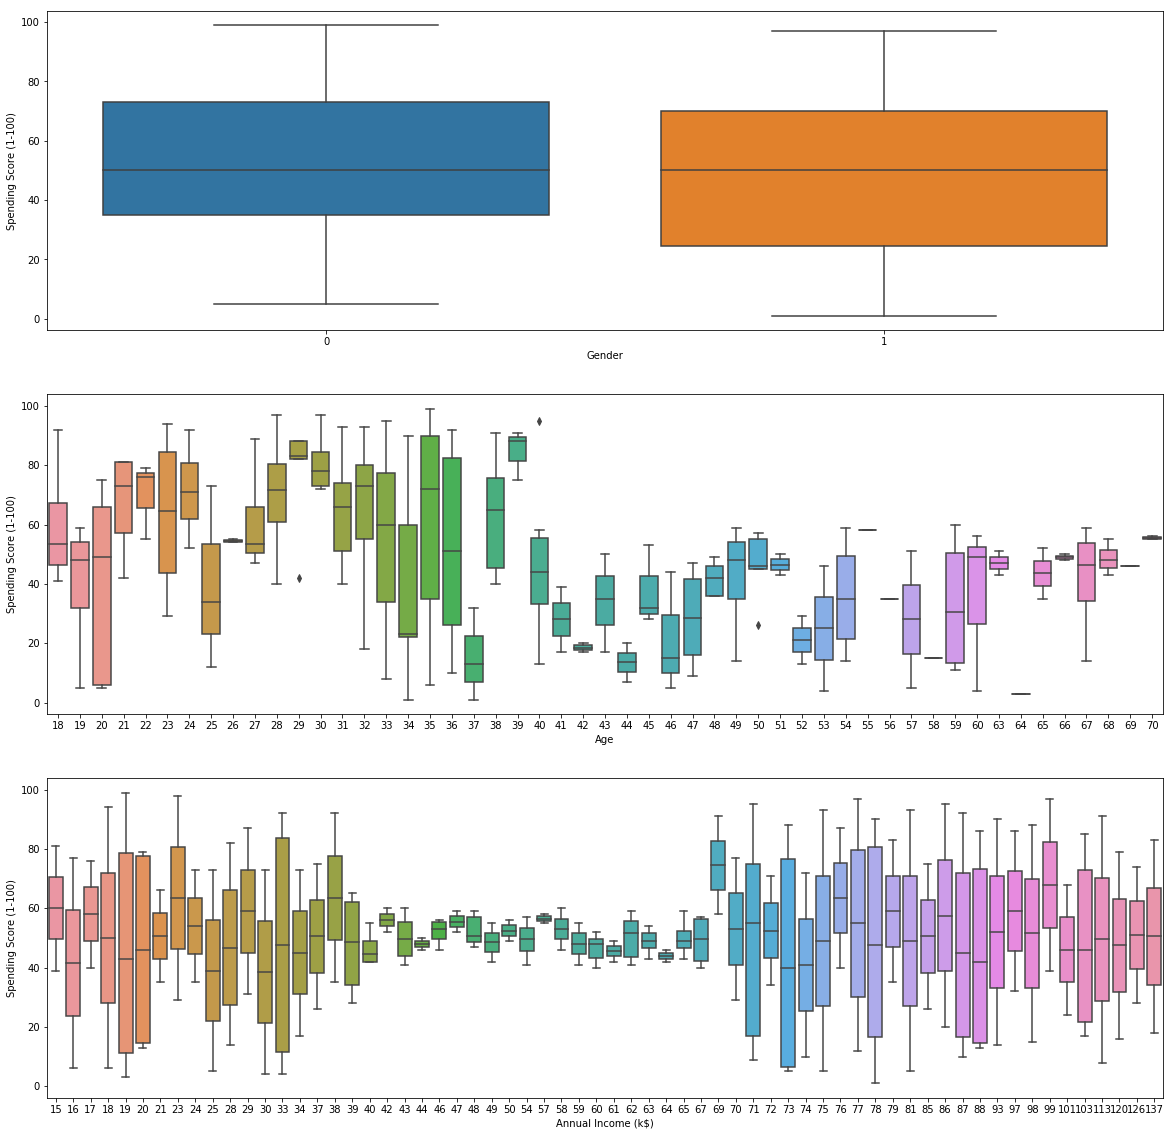

In [9]:
plt.figure(1 , figsize = (20 , 20))
k=0
for i in data1.columns[0:3]:
    k+=1
    plt.subplot(3,1,k)
    sns.boxplot(x=i, y='Spending Score (1-100)', data=data1)


Что видем:
выбросов нет. все данные в пределам (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах (2,7 сигм)

1. женщины имеют выше рейтинг, чем мужчины
2. после 40 лет рейтинг сильно снижается
3. 21-24 и 26-30 лучший возраст))
4. доход от 40 до 70 тыс в год - оч. консеративны. траты постоянны. низких скоров нет как и высоких
5. доход до 40 и после 70 тыс. в год  - распределены равномерно по всем значениям скора
6. 2 кластера по возрасту/3 кластера по доходу



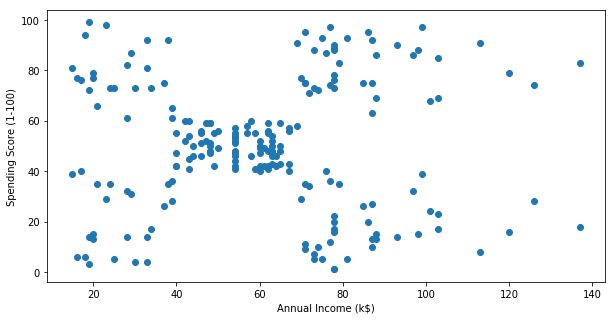

In [10]:
plt.figure(1 , figsize = (10 , 5))
plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' , data = data1)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.show()

**Так как не возможно трактовать кластеры по 4-м и более измерениям. определимся с парами признаков для каждой пары найдем кластеры и сделаем бизнес выводы** 


воспользуемся коэф силуэта

Коэффициент силуэта — метрика качества, которая позволяет выбрать количество кластеров. Коэффициент
силуэта для некоторого фиксированного объекта определяется следующим образом:
<tex>$$s={{(b - a)}\over{max (a , b)}}$$</tex>


где a — среднее расстояние от данного объекта до других объектов из того же кластера,
b — среднее расстояние от данного объекта до объектов из ближайшего другого кластера.

In [11]:
X=data1[['Annual Income (k$)', 'Spending Score (1-100)']].values

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395


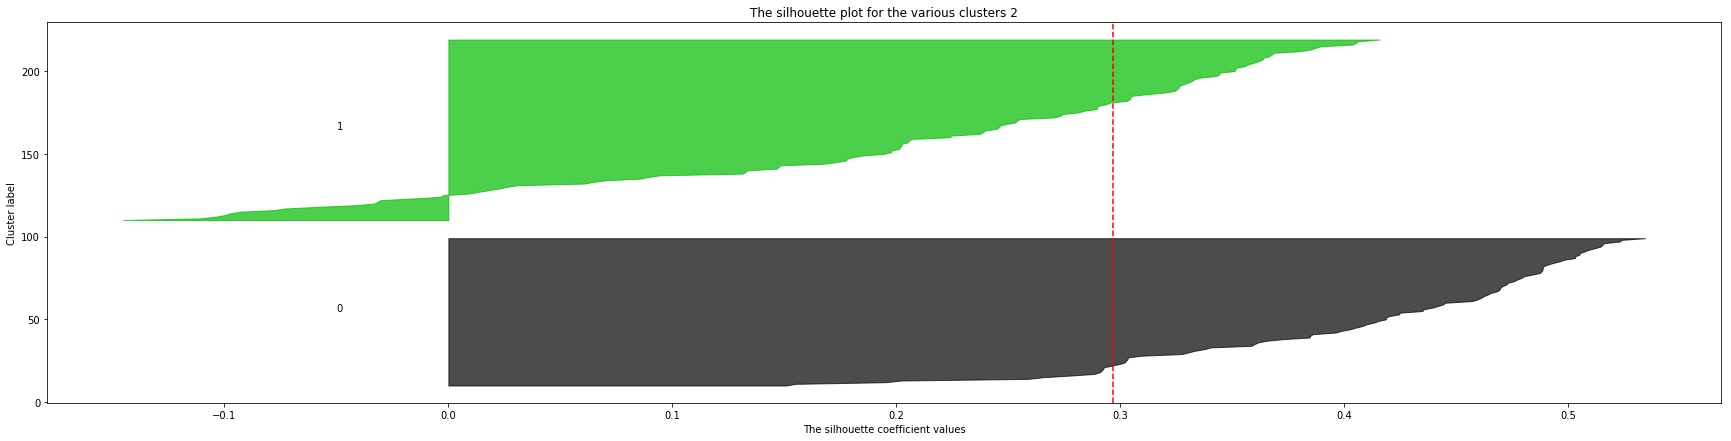

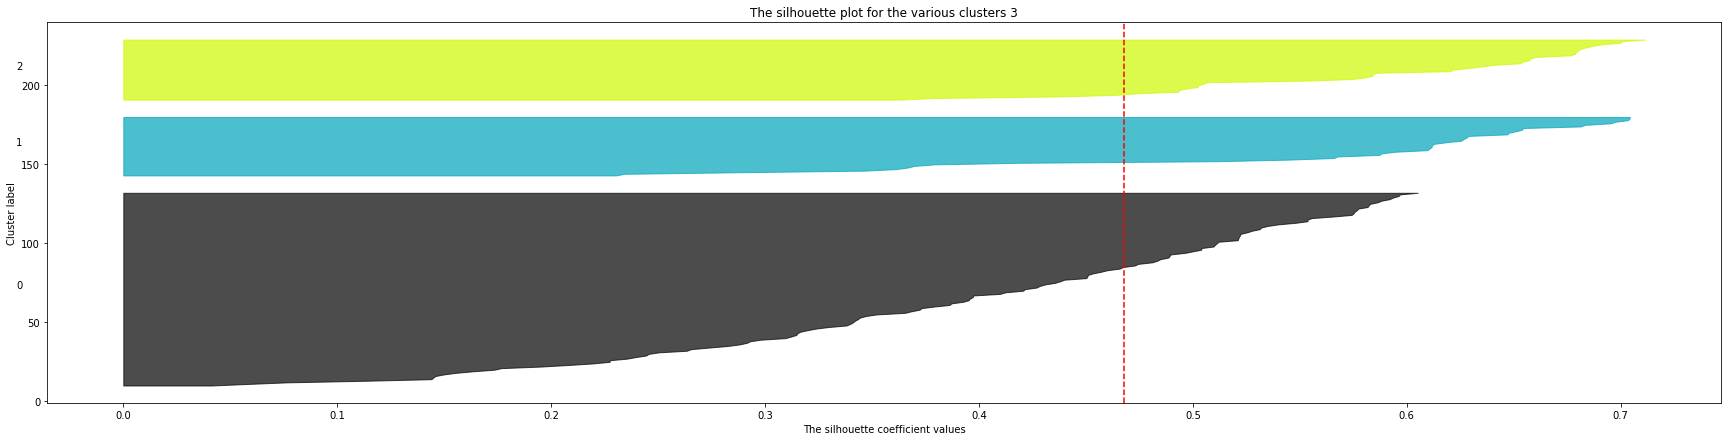

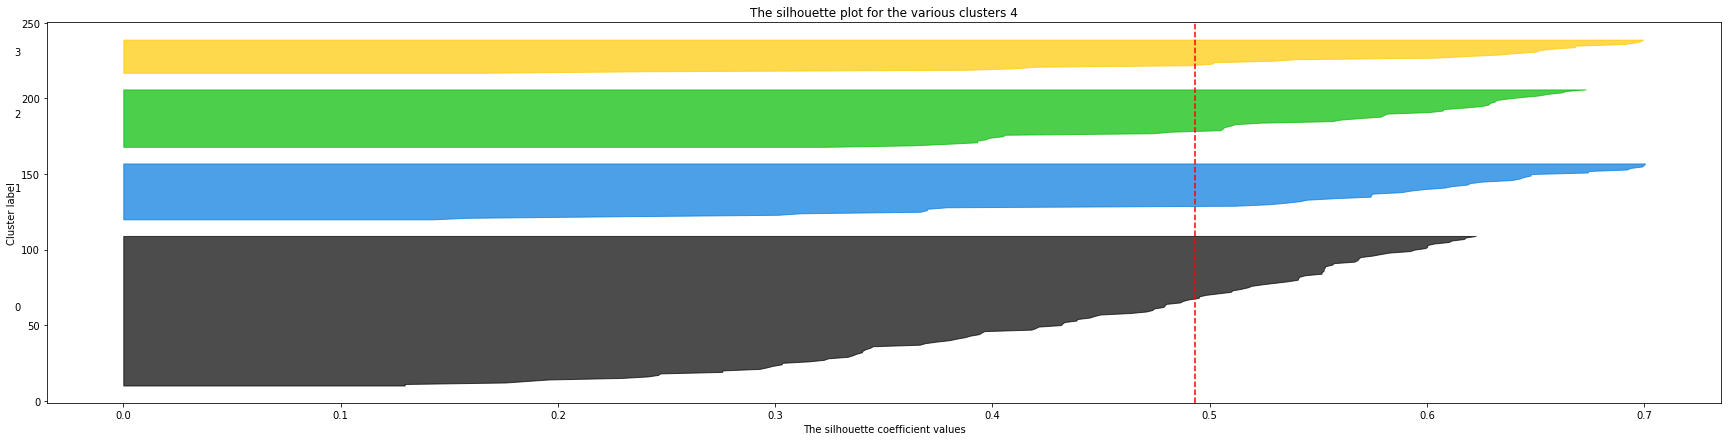

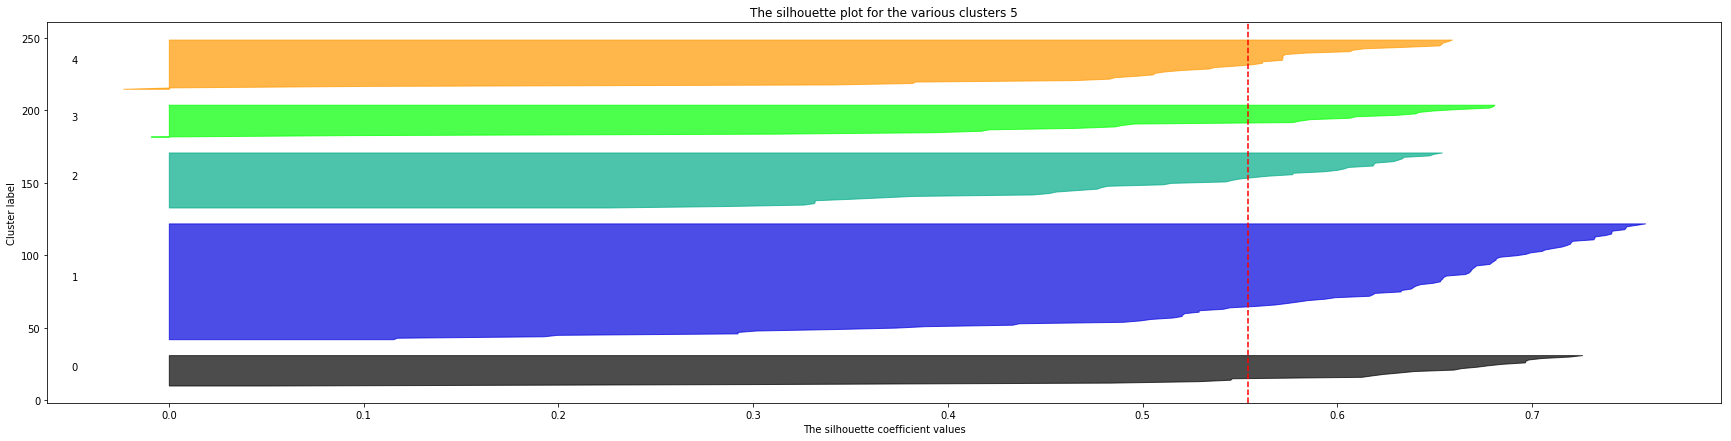

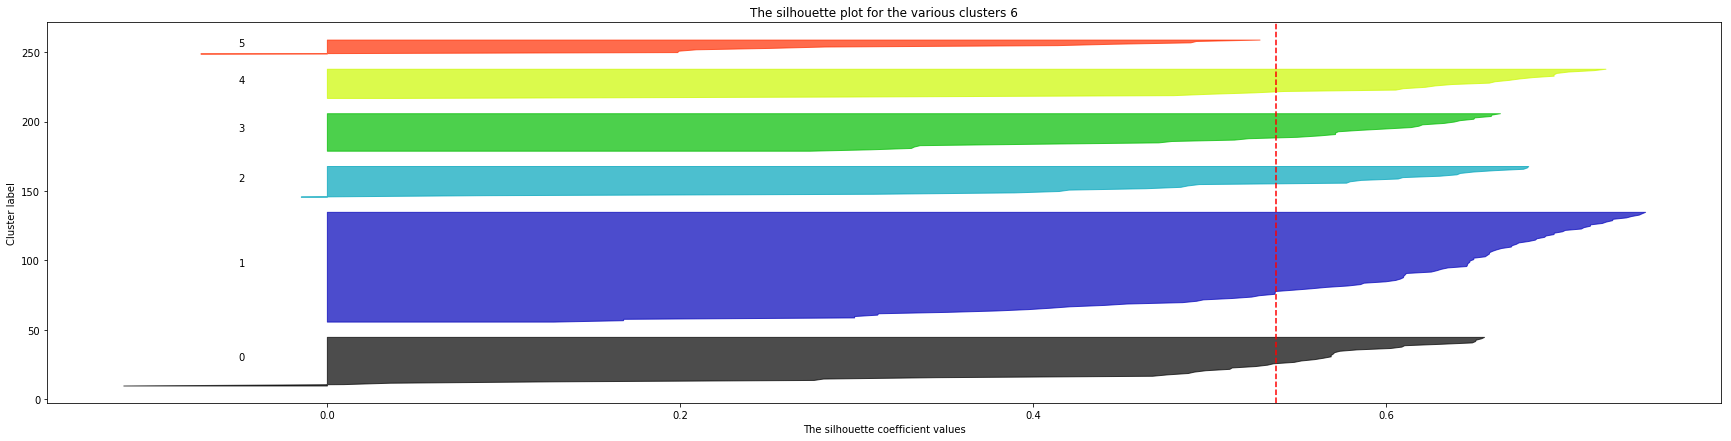

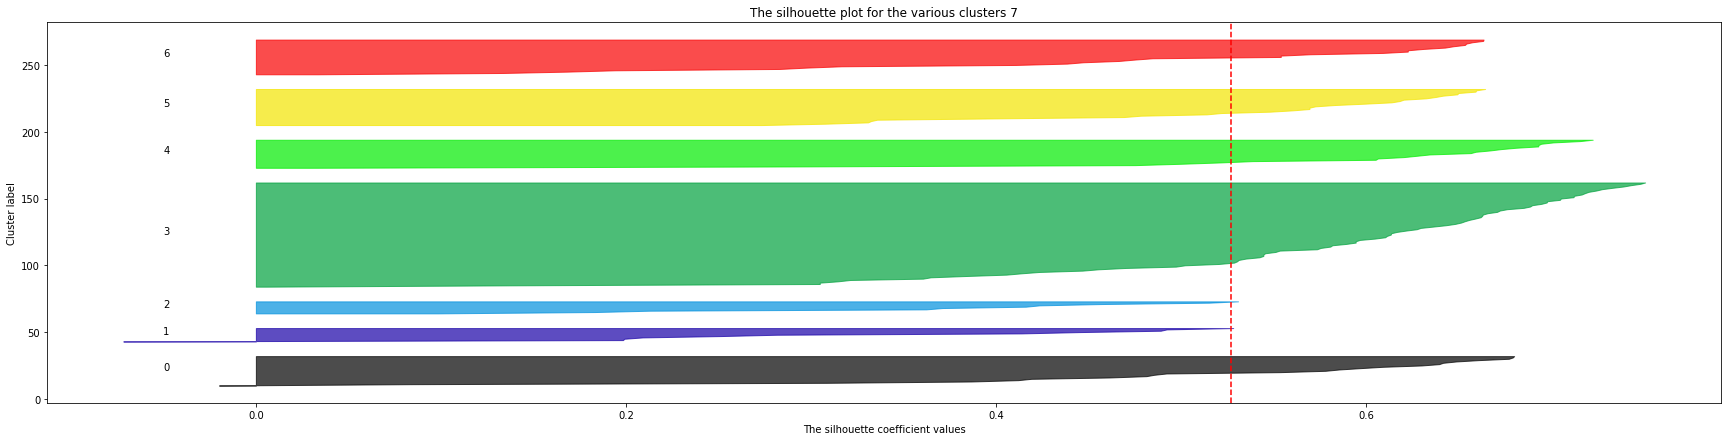

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(30, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

   
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters {}".format(i+1))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

   





In [13]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 500, random_state = 0)
y_clusters = model.fit_predict(X)

In [14]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [27]:
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

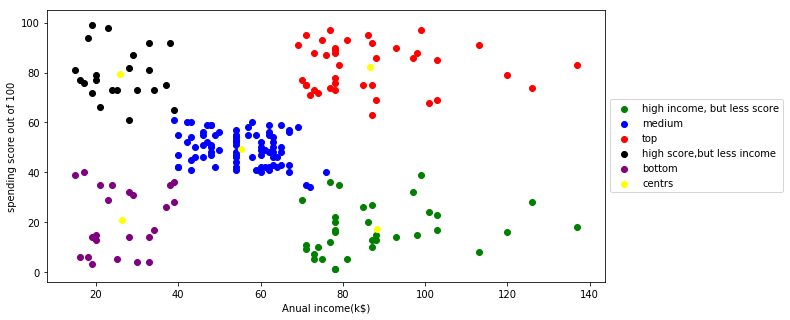

In [42]:
plt.figure(1 , figsize = (10 , 5))
plt.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1], c = 'g', label = "high income, but less score")
plt.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1], c = 'b', label = "medium")
plt.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1], c = 'r', label = "top")
plt.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1], c = 'black', label = "high score,but less income")
plt.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1], c = 'purple', label = "bottom")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c = "yellow", label = "centrs")
plt.xlabel("Anual income(k$)")
plt.ylabel("spending score out of 100")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
incrome_score=pd.DataFrame(y_clusters)

In [32]:
incrome_score.columns = ['incrome_score']

In [33]:
data = pd.concat([data, incrome_score], axis=1) # 

In [34]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),incrome_score
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [36]:
X1=data1[['Age', 'Spending Score (1-100)']].values

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 The average silhouette_score is : 0.45300127016521263
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 The average silhouette_score is : 0.46553524067755037
For n_clusters = 6 The average silhouette_score is : 0.4376185638584134
For n_clusters = 7 The average silhouette_score is : 0.42313509747504796


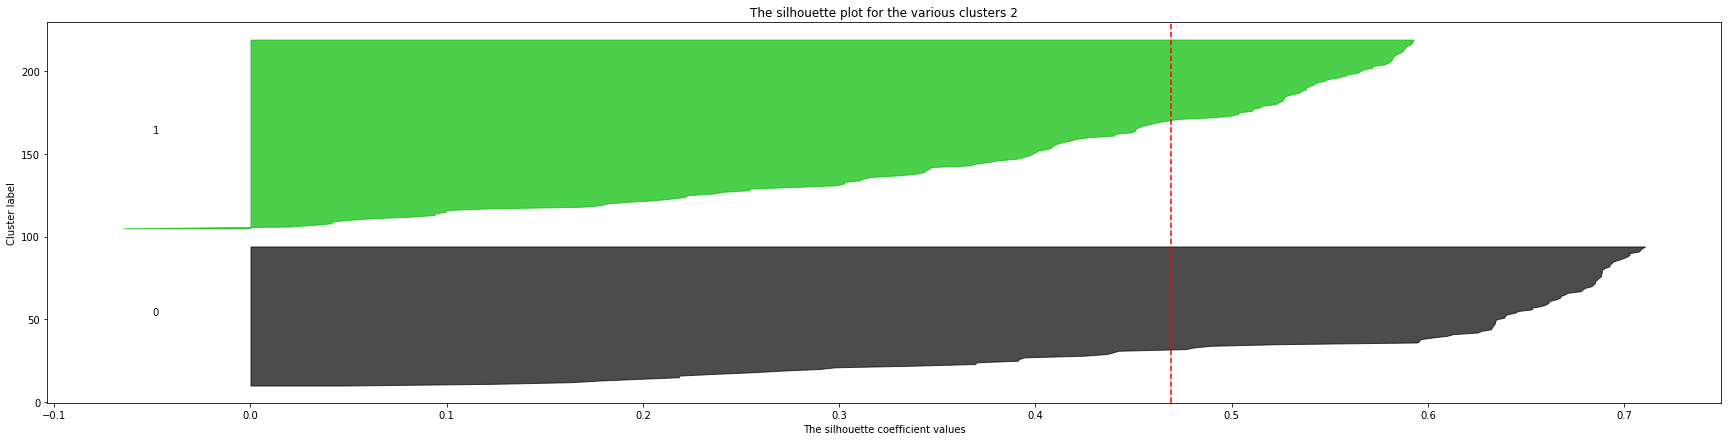

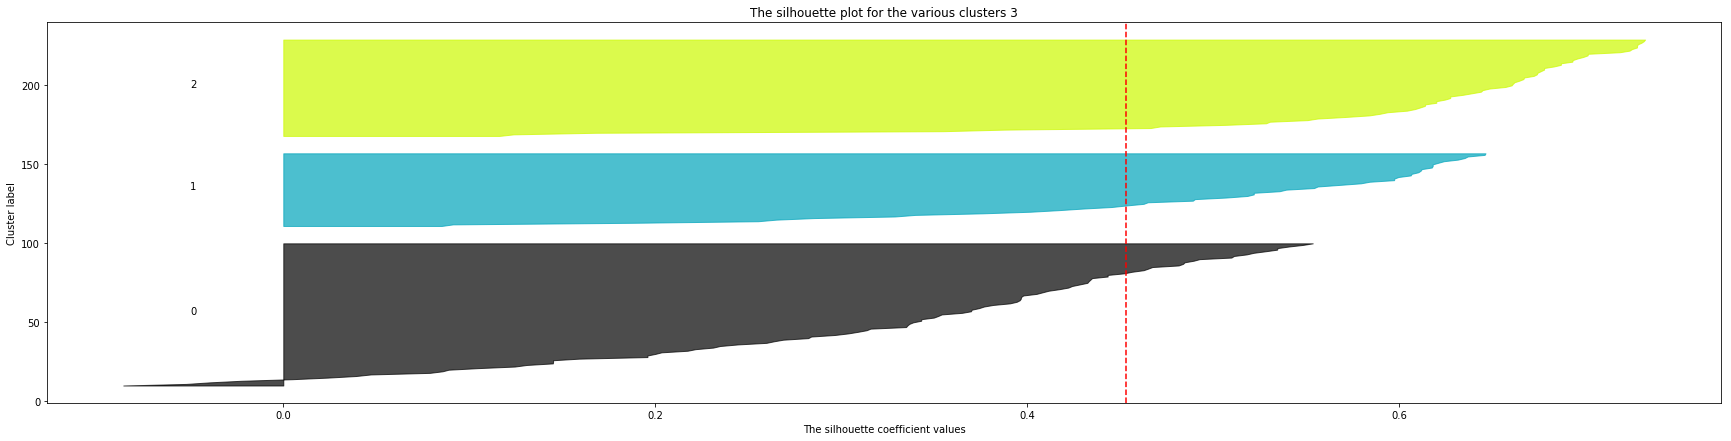

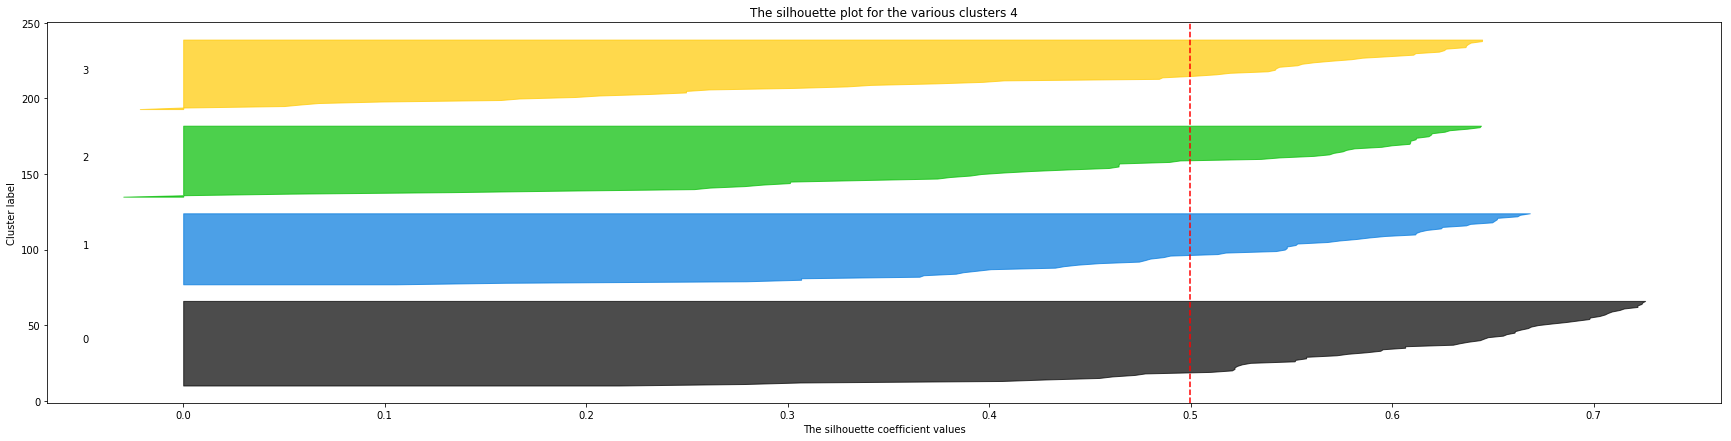

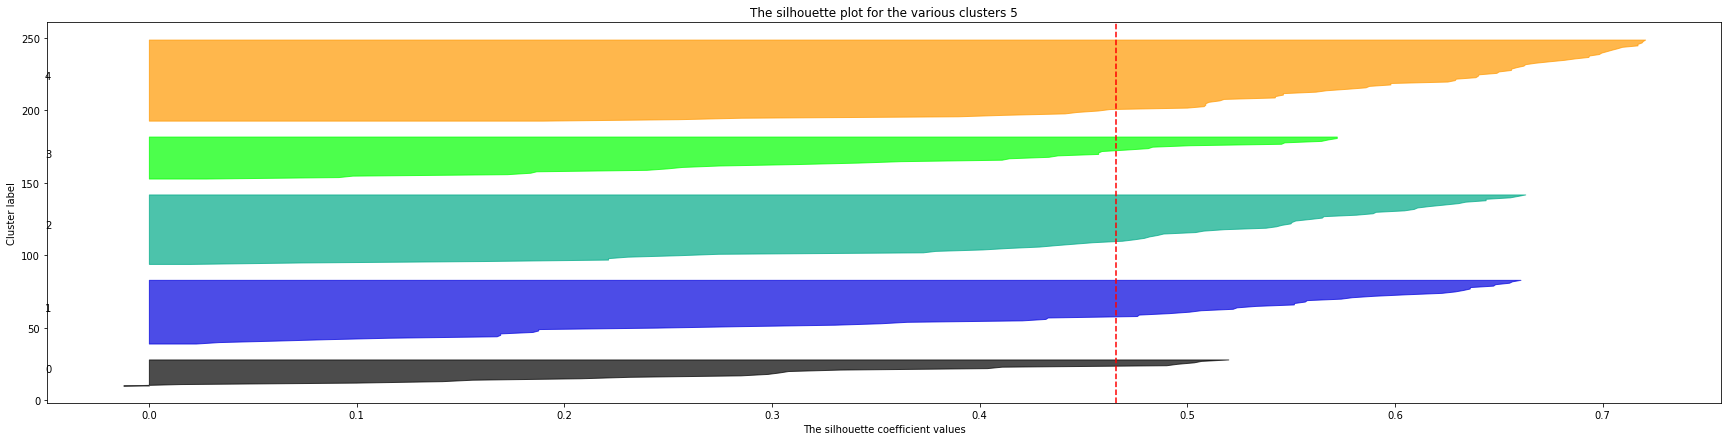

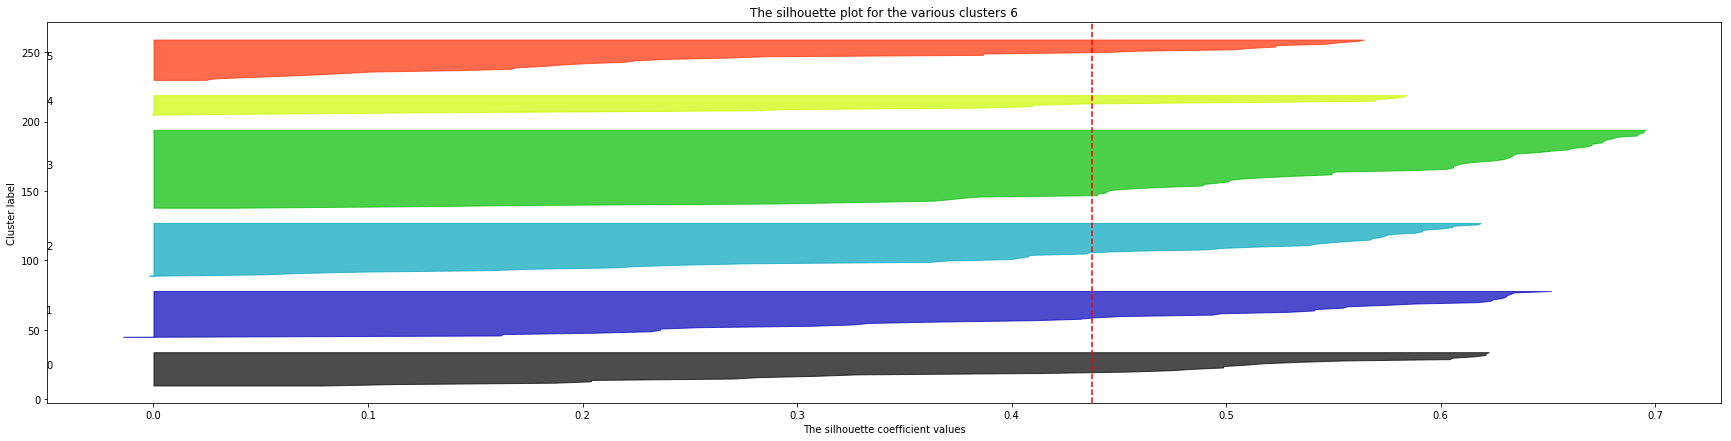

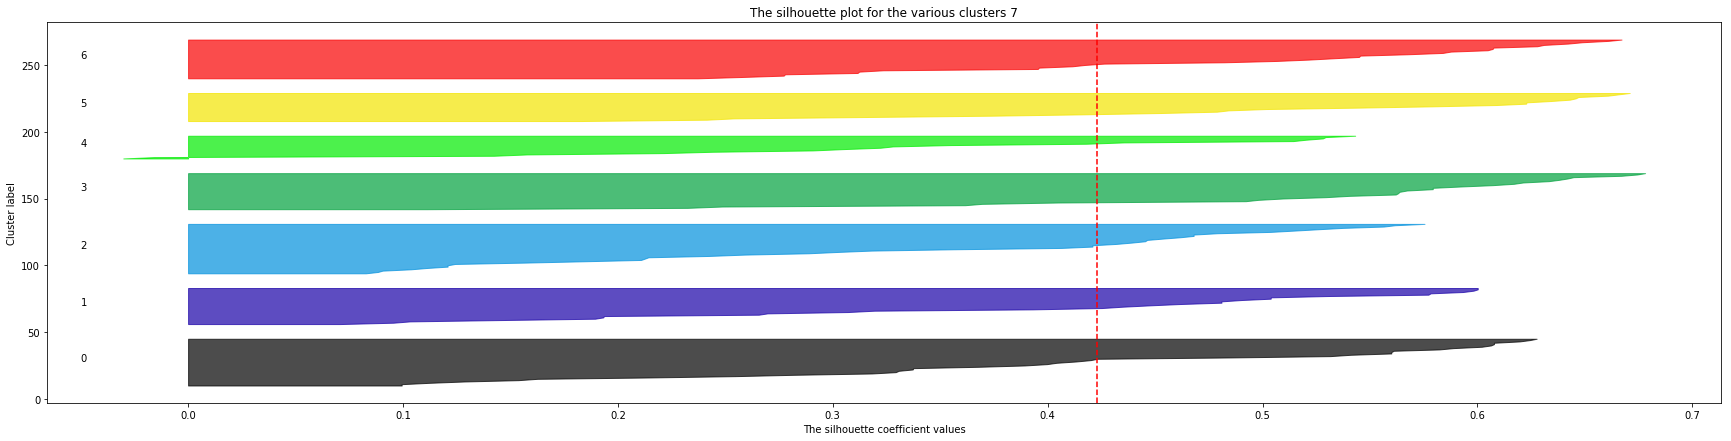

In [50]:
range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(30, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

   
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters {}".format(i+1))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

   

In [78]:
model1 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, random_state = 0)
y_clusters1 = model1.fit_predict(X1)

In [79]:
model1.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

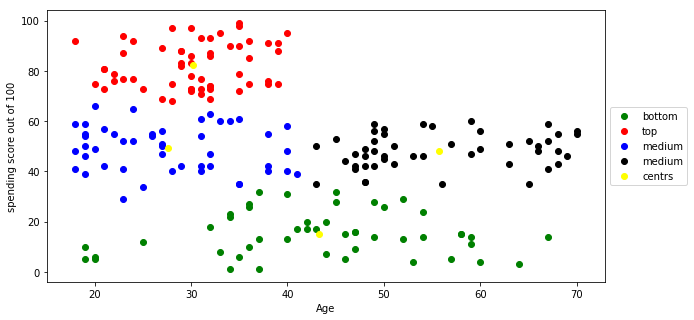

In [80]:
plt.figure(1 , figsize = (10 , 5))
plt.scatter(X1[y_clusters1 == 0,0],X1[y_clusters1 == 0,1], c = 'g', label = "bottom")
plt.scatter(X1[y_clusters1 == 1,0],X1[y_clusters1 == 1,1], c = 'r', label = "top")
plt.scatter(X1[y_clusters1 == 2,0],X1[y_clusters1 == 2,1], c = 'b', label = "medium")
plt.scatter(X1[y_clusters1 == 3,0],X1[y_clusters1 == 3,1], c = 'black', label = "medium")
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1], c = "yellow", label = "centrs")
plt.xlabel("Age")
plt.ylabel("spending score out of 100")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [44]:
age_score=pd.DataFrame(y_clusters1)

In [45]:
age_score.columns = ['age_score']

In [46]:
data = pd.concat([data, age_score], axis=1) 

In [47]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),incrome_score,age_score
0,1,1,19,15,39,4,2
1,2,1,21,15,81,3,1
2,3,0,20,16,6,4,0
3,4,0,23,16,77,3,1
4,5,0,31,17,40,4,2


In [68]:
X2=data1[['Age', 'Annual Income (k$)']].values

For n_clusters = 2 The average silhouette_score is : 0.42620850066216065
For n_clusters = 3 The average silhouette_score is : 0.4254725038202792
For n_clusters = 4 The average silhouette_score is : 0.43295184273333076
For n_clusters = 5 The average silhouette_score is : 0.40366620604639963
For n_clusters = 6 The average silhouette_score is : 0.3959805131239844
For n_clusters = 7 The average silhouette_score is : 0.38461608271423064


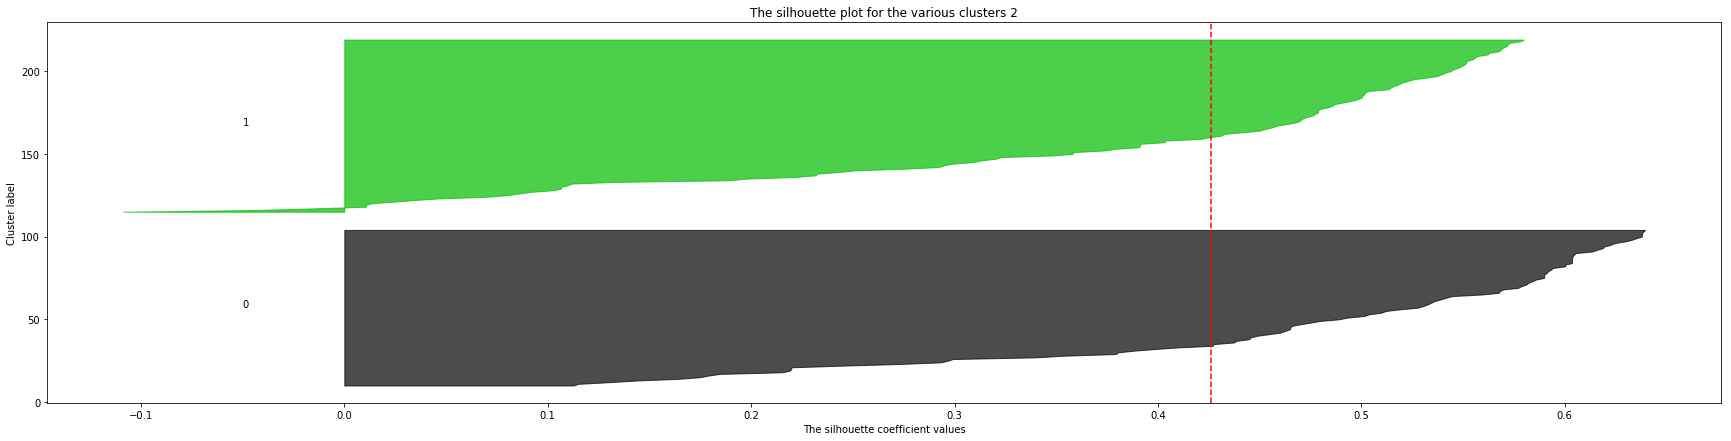

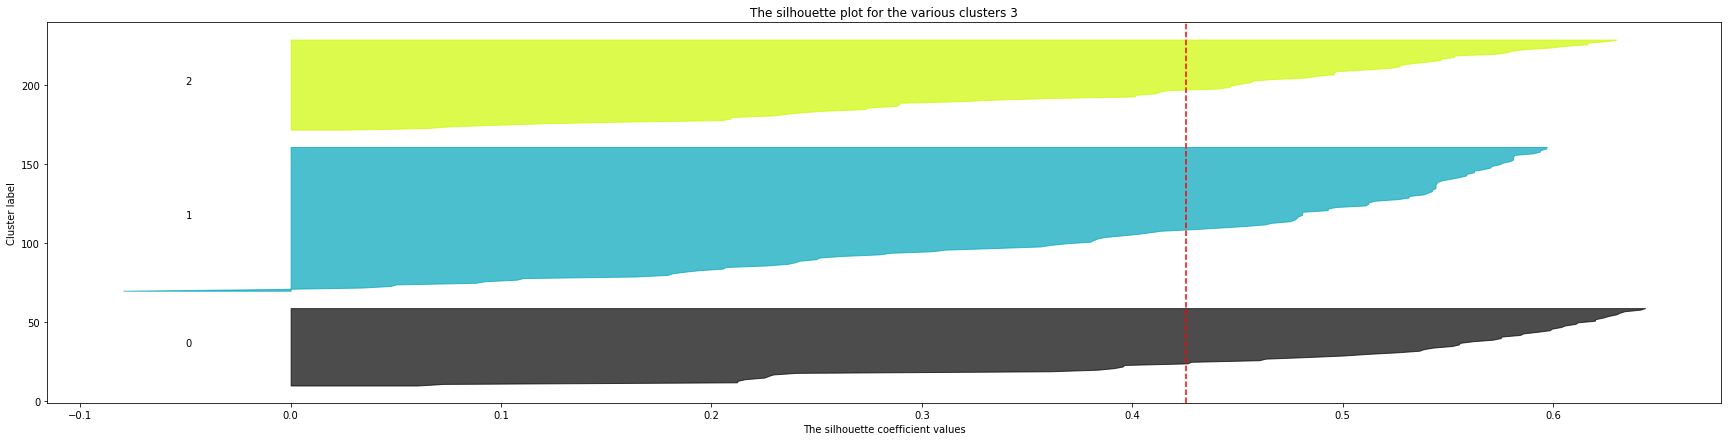

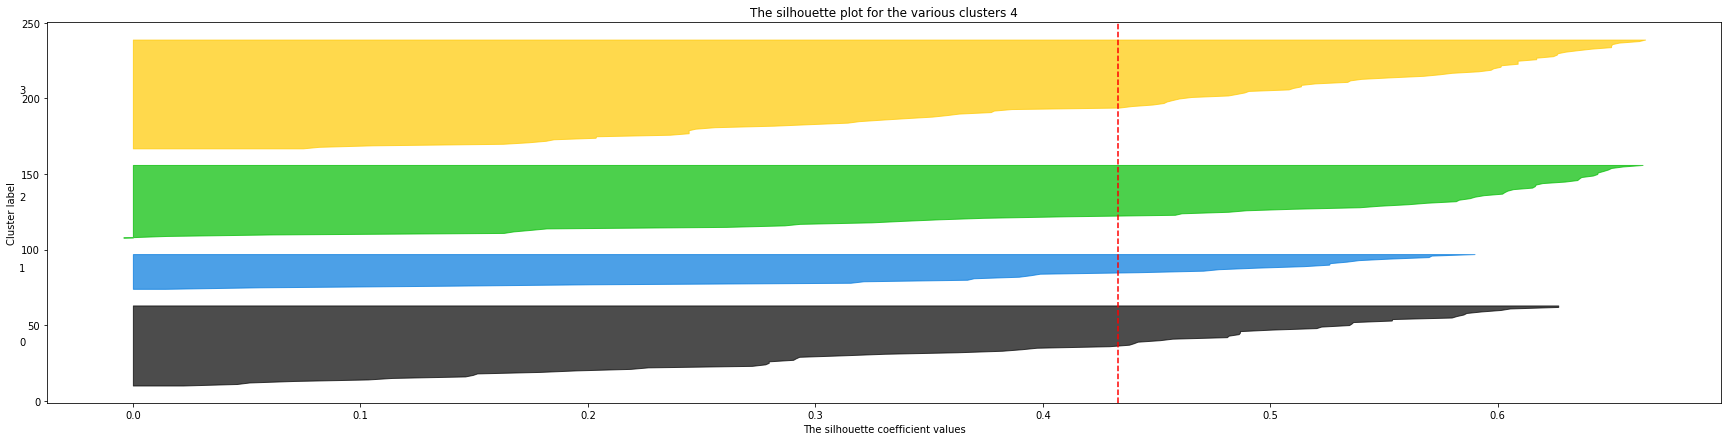

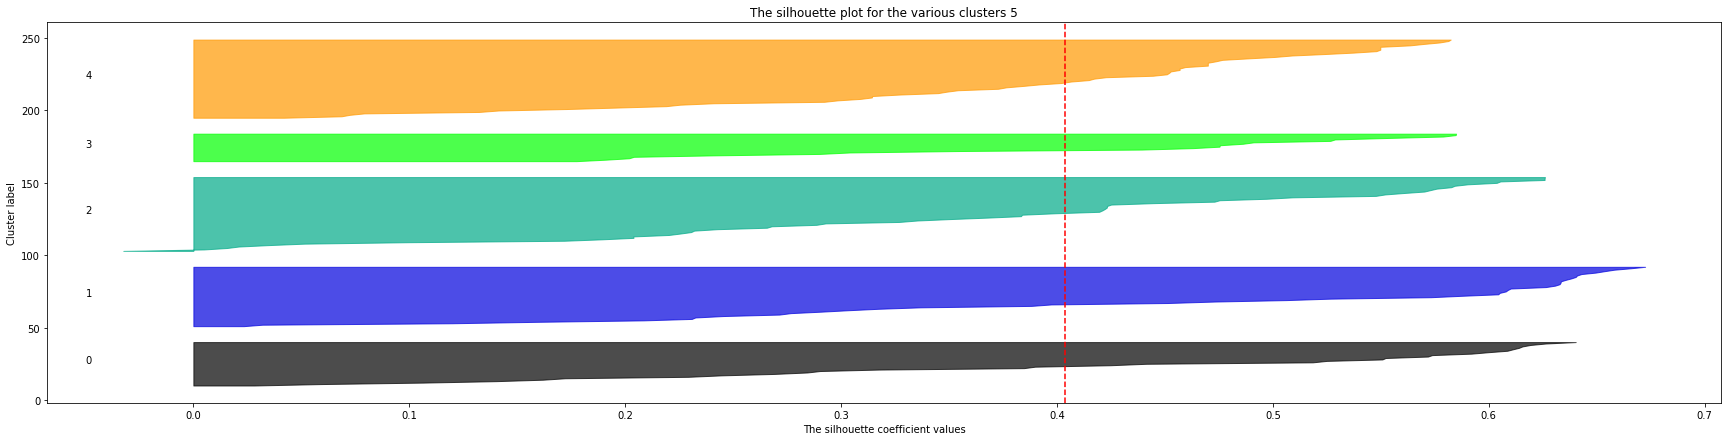

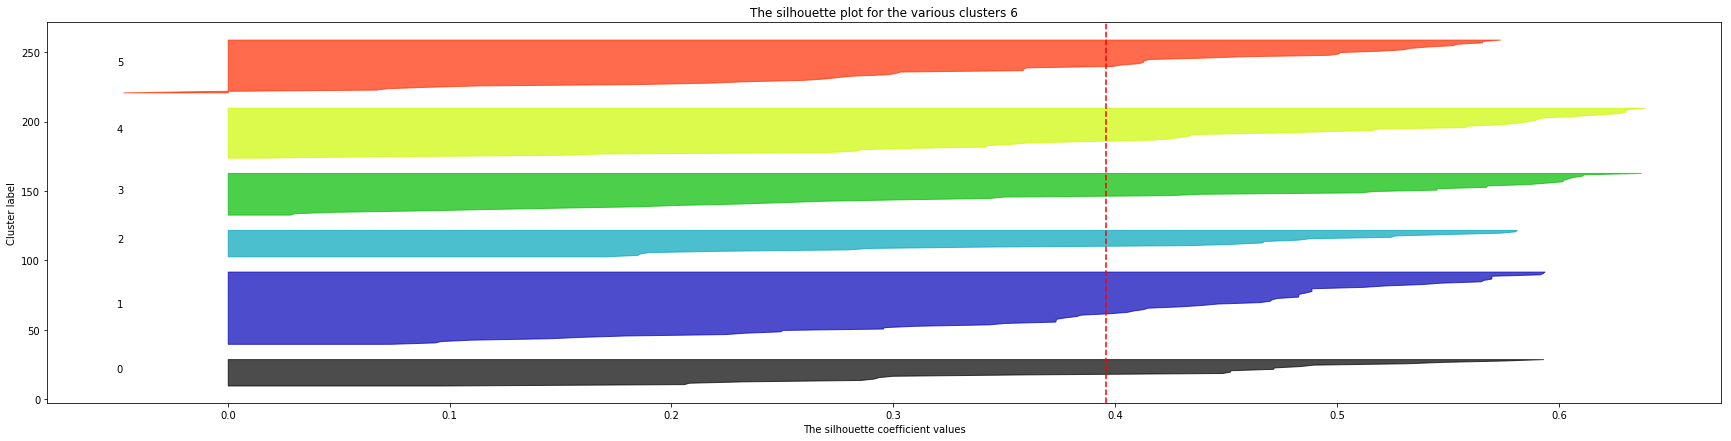

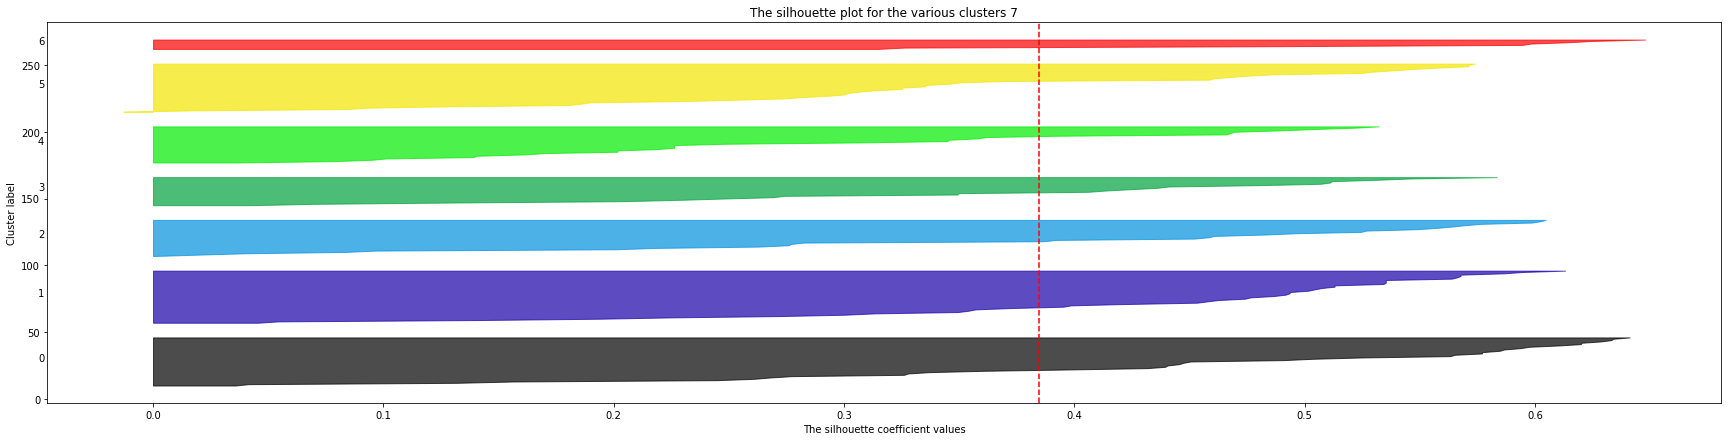

In [71]:
range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(30, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

   
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters {}".format(i+1))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


In [72]:
model2 = KMeans(n_clusters = 3, init = "k-means++", max_iter = 500, random_state = 0)
y_clusters2 = model2.fit_predict(X2)

In [73]:
model2.cluster_centers_

array([[34.34782609, 82.82608696],
       [28.36      , 31.44      ],
       [55.03448276, 50.34482759]])

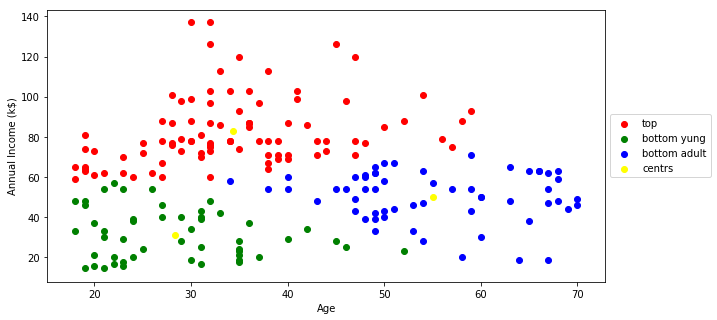

In [81]:
plt.figure(1 , figsize = (10 , 5))
plt.scatter(X2[y_clusters2 == 0,0],X2[y_clusters2 == 0,1], c = 'r', label = "top" )
plt.scatter(X2[y_clusters2 == 1,0],X2[y_clusters2 == 1,1], c = 'g', label = "bottom yung" )
plt.scatter(X2[y_clusters2 == 2,0],X2[y_clusters2 == 2,1], c = 'b', label = "bottom adult")
plt.scatter(model2.cluster_centers_[:,0],model2.cluster_centers_[:,1], c = "yellow", label = "centrs")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [82]:
income_age=pd.DataFrame(y_clusters2)

In [83]:
income_age.columns = ['income_age']

In [84]:
data = pd.concat([data, income_age], axis=1) 

In [85]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),incrome_score,age_score,income_age
0,1,1,19,15,39,4,2,1
1,2,1,21,15,81,3,1,1
2,3,0,20,16,6,4,0,1
3,4,0,23,16,77,3,1,1
4,5,0,31,17,40,4,2,1


Итого: 
income_score - хорошо отличичим топ клиентов с высоким рейтингом и доходом - кластер 2

age_score - виден класет  - топ по рейтингу и возрастом до 40 - кластер 1

income_age - определили людей с макс доходом, независимо от возраста - кластер 0

найдем этот топ

In [95]:
data[(data.incrome_score == 2) & (data.age_score==1) & (data.income_age==0)] # топ клиентов

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),incrome_score,age_score,income_age
123,124,1,39,69,91,2,1,0
125,126,0,31,70,77,2,1,0
127,128,1,40,71,95,2,1,0
129,130,1,38,71,75,2,1,0
131,132,1,39,71,75,2,1,0
133,134,0,31,72,71,2,1,0
135,136,0,29,73,88,2,1,0
137,138,1,32,73,73,2,1,0
139,140,0,35,74,72,2,1,0
141,142,1,32,75,93,2,1,0


в зависомости от цели помжно выбирать разные кластеры. например взрослых обеспеченных людей с высоким рейтингом. например:

In [98]:
data[ (data.age_score==3) & (data.income_age==0|2)] # топ от 45 лет

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),incrome_score,age_score,income_age
40,41,0,65,38,35,4,3,2
42,43,1,48,39,36,4,3,2
46,47,0,50,40,55,1,3,2
50,51,0,49,42,52,1,3,2
53,54,1,59,43,60,1,3,2
54,55,0,50,43,45,1,3,2
55,56,1,47,43,41,1,3,2
56,57,0,51,44,50,1,3,2
57,58,1,69,44,46,1,3,2
59,60,1,53,46,46,1,3,2


и так далее